#### 3.4 贝叶斯模型比较

在第一章中，我们强调了过拟合问题，以及使用交叉验证技术设置正则化参数值或选择替代模型。这里我们从贝叶斯视角来考虑模型选择问题。在本节中，我们的讨论会非常的一般化，在3.5节我将会看到这些想法是怎样应用到线性回归中的正则化参数的定义的。

正如我们看到的，过拟合是与最大似然相关的，它可以通过在模型参数上的边缘化（求和或积分）取代在值上的点估计。模型可以直接在训练数据上进行比较，并不需要验证集。这使得所有的可用数据用于训练，避免使用交叉验证的对每个模型的多次运行。在训练过程中同时定义多个复杂性参数是可以的。比如，在第7章，我们将引入相关向量机，对于每个训练数据点，贝叶斯模型只有一个复杂性参数。

贝叶斯观点的模型比较简单地包括概率使用来表示模型选择中的不确定性，沿用一致性应用的概率加和和乘积规则。假设我们想比较一个$L$的集合的模型$\{\mathcal{M}_i\}$，其中$i=1,\cdots,L$。这里模型是与观测数据$\mathcal{D}$上的概率分布相关的。在多项式的曲线拟合问题中，分布是在目标值$\mathsf{t}$集合上定义的，而输入值$\mathbf{X}$假设是已知的。其它类型的模型定义了一个在$\mathbf{X}$和$\mathbf{t}$上联合分布。我们假设数据是从这些模型中的一个生产的，但我们不知道到底是哪个。我们的不确定是通过先验分布$p(\mathcal{M}_i)$表达的。给出一个训练集$\mathcal{D}$，我们希望评估后验分布

$$p(\mathcal{M}_i \mid \mathcal{D}) \propto p(\mathcal{M}_i)p(\mathcal{D} \mid \mathcal{M}_i)$$

先验它是对不同模型的偏好。让我们简单假设所有给定的模型的先验是等价。有趣是模型评估$p(\mathcal{D} \mid \mathbf{M}_i)$这项，它表示的是在不同模型下的数据偏好，我们待会儿会详细检查这项。模型评估有时候被称作边缘似然，因为它可以看做是在模型空间上的似然函数，其中参数被边缘化了。对于两个模型的评估率$p(\mathcal{D} \mid \mathcal{M}_i)/p(\mathcal{D} \mid \mathcal{M}_j)$称作贝叶斯因子（Kass和Raftery，1995年）。

一旦我们知道了模型上的后验分布，就可以从加和和乘积规则中得到预测分，如下

$$p(t \mid \mathbf{x},\mathcal{D}) = \sum_{i=1}^Lp(t\mid\mathbf{x},\mathcal{M}_i,\mathcal{D})p(\mathcal{M}_i \mid \mathcal{D})$$

这是通过平均独立模型的预测分布$p(t\mid\mathbf{x},\mathcal{M}_i,\mathcal{D})$，加权这些模型的后验分布$p(\mathcal{M}_i \mid \mathcal{D})$得到的所有预测分布的混合分布的例子。比如，如果我们有两个模型，它们的后验等价于，一个预测在$t=a$附近的窄分布，而另一个预测是在$t=b$附近的窄分布，整体上的预测分布是一个在$t=a$和$t=b$上的单峰分布模型，而不是在$t=(a+b)/2$上的单个模型。

一个简单的近似是模型平均是使用单个大可能模型来单独预测。这就是模型选择。

由参数$\mathbf{w}$集合控制的模型，从概率加和和乘积规则中得到模型评估如下

$$p(\mathcal{D} \mid \mathcal{M}_i) = \int p(\mathcal{D} \mid \mathbf{w}, \mathcal{M}_i)p(\mathbf{w} \mid \mathcal{M}_i)d\mathbf{w}$$

从抽样角度来看，边缘似然可以被看作是从模型中生成数据集$\mathcal{D}$的概率，这个模型的参数来自采样先验。有趣的是，当评估参数上的后验分布时，出现在贝叶斯定理上分母中标准化项就是正当，因为

$$p(\mathbf{w} \mid \mathcal{D}, \mathcal{M}_i) = \frac{p(\mathcal{D} \mid \mathbf{w}, \mathcal{M}_i)p(\mathbf{w} \mid \mathcal{M}_i)}{p(\mathcal{D} \mid \mathcal{M}_i)}$$

我们可以通过参数上的积分做一个简单的近似来更多地了解模型的正当。首先考虑一个一元参数$w$的模型。参数上的后验分布正比于$p(\mathcal{D} \mid w)p(w)$，为了保持符号整洁，我们这里忽略了模型$\mathcal{M}_i$的相关性。如果我们假设后验分布在大概率值$w_{\text{MAP}}$，宽度$\Delta w_{\text{posterior}}$附近是急剧尖峰的，那么我们可以通过被积函数的最大值乘以峰值宽度来近似积分。如果我们进一步假设先验的扁平宽度为$\Delta w_{\text{prior}}$，所以有$p(w) = 1/\Delta w_{\text{prior}}$，那么我们有

$$p(\mathcal{D}) = \int p(\mathcal{D} \mid w)p(w)dw \simeq p(\mathcal{D} \mid w_{\text{MAP}}) \frac{\Delta w_{\text{posterior}}}{\Delta w_{\text{prior}}}$$

所以取对数我们有

$$\ln p(\mathcal{D}) \simeq \ln p(\mathcal{D} \mid w_{\text{MAP}}) + \ln\left(\frac{\Delta w_{\text{posterior}}}{\Delta w_{\text{prior}}}\right)$$

> 注：从以上等式中可以看出，实际在使用最大MAP得到的数据，只是现有观测数据的一种近似，而非等价，这个取决于使用的模型本身，不同的模型的近似程度还不一样，另外剩余项就是对模型的惩罚才能算是真实的数据生成模型。

如图3.12中的似然。第一项表示的是在给出最大可能参数时，拟合的数据，对于扁平的先验来说这就是相应的似然函数。第二项是根据它的复杂性来惩罚模型。因为当$\Delta w_{\text{posterior}} < \Delta w_{\text{prior}}$时，这项为负数，当$\Delta w_{\text{posterior}}/\Delta w_{\text{prior}}$变得更小时，它的变动也就会增加。因此，如果在后验分布中参数能够微调到数据，那么惩罚项会变大。

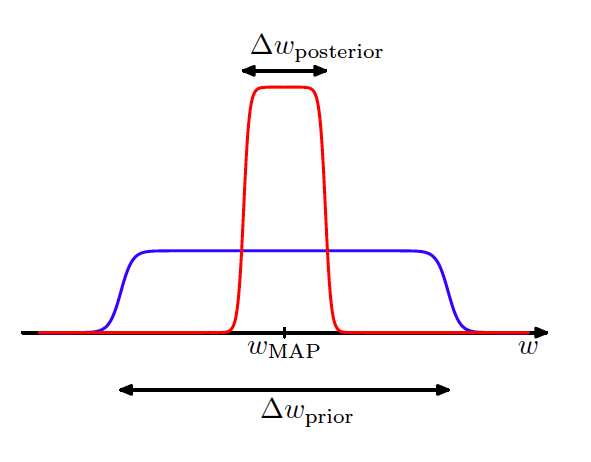

<center>图3.12 如果我们假设参数上的后验分布在模式$w_{\text{MAP}}$附近急剧尖峰，我们可以得到一个对模型正当的大致近似。</center>

对于一组有$M$个参数的模型，我们可以依次对每个参数做很小的近似。假设所有的参数都有同样的比率$\Delta w_{\text{posterior}}/\Delta w_{\text{prior}}$，我们有

$$\ln p(\mathcal{D}) \simeq \ln p(\mathcal{D} \mid w_{\text{MAP}}) + M\ln\left(\frac{\Delta w_{\text{posterior}}}{\Delta w_{\text{prior}}}\right)$$

因此，在这个很小的近似上，复杂度惩罚的大小随着模型中可调参数$M$数量而增长，因为一个复杂模型能更好地拟合数据，第二项也会依赖于$M$而增长。最优模型复杂度，是由最大正当定义，将会在这两个竞争项之间达到平衡后得到。过后我们会开发一个基于高斯近似到后验分布的更加精确的版本。

通过考虑图3.13，我们可以更进一步了解贝叶斯模型比较，明白边际似然是如何成为了中性复杂度的最好模型的。这里的水平轴是可能数据集空间的一维表示，所以坐标轴上的每个数据点相应地是一个特殊的数据集。我们现在考虑三个复杂度相继增加的模型$\mathcal{M}_1, \mathcal{M}_2$和$\mathcal{M}_3$。想象一下运行这些生成模型来生成数据集，然后看一下结果的数据集分布。任何给定模型能够生成各种不同数据集，因为模型参数是由先验概率分布控制的，对于任何参数的选择，在目标变量上都可能存在随机噪声。为了从一个特殊模型中生成一个特殊的数据集，我们先从它们的先验分布$p(\mathbf{w})$中选择参数值，那么对于这些参数值我们从$p(\mathcal{D} \mid \mathbf{w})$中采样数据。一个简单的模型（比如，对于一次多项式）有很小的变化性，所以生成的数据集几乎是相似的。它的分布$p(\mathcal{D})$因而受限于相当小的水平轴区域。相比而言，一个复杂模型（比如9次多项式）会生成有着很大变化的不同数据集，所以他的分布$p(\mathcal{D})$是在一个大的数据集空间去区域扩散的。因为分布$p(\mathcal{D} \mid \mathcal{M}_i)$是标准化过的，我们看到这个特殊数据集$\mathcal{D}_0$对于中等复杂度的模型有着更高值的正当。事实上，更小的模型不不饿能很好地拟合数据，而更复杂的模型它的预测概率会在一个很大的数据集范围内扩散，所以应给它们中的任何一个分配较小的概率。

贝叶斯模型比较框架中隐含的假设是，生成数据的真实分布包含在所考虑的模型集合中。提供的这些，我们可以证明贝叶斯模型比较会平均上偏好正确模型。为了弄明白这个，考虑两个模型$\mathcal{M}_1$和$\mathcal{M}_2$，其真正的对应的是$\mathcal{M}_1$。对于一个给定的有限数据集，对于不准确的模型，很可能贝叶斯因子会更大。因而，如果我们对贝叶斯因子求分布数据集上的平均，我们得到期望贝叶斯因子如下

$$\int p(\mathcal{D} \mid \mathcal{M}_1) \ln \frac{p(\mathcal{D} \mid \mathcal{M}_1)}{p(\mathcal{D} \mid \mathcal{M}_2)}d\mathcal{D}$$

其中均值是用来表示数据的真实分布。这是KL散度的例子，满足性质永远为正，除非这连个部分相等，那么其值为0.因此平均来看贝叶斯因子将一直偏好与正确模型。

我们看到贝叶斯框架避免了过拟合问题，它允许模型可以在训练集基础上单独互相比较。然而，贝叶斯方法，也跟其他模式识别的方法一样，需要对模型的形式做出假设，如果这些都不可用那么结果也会被误导。特别是，我们从3.12中看到，模型的正当在先验的许多方面都可能很敏感，如在尾部的形态。事实上，如果先验不合适的话，那么正当就不能反应出来，如可以通过关注一个不恰当的先验有任意扩展的因子（换句话说，因为分布没有标准化，标准化系数也不会被定义）来看出。如果我们考虑一个合适的先验，然后取一个合适的极限，来得到一个不合适的先验（比如，一个高斯先验取无限方差）那么凭证将会变为0，如3.70和图3.12中看到的那样。它可能，会先考虑在两个模型之间的正当率，然后取一个极限得到有意义的答案。

因此，在实际应用中，留一份独立的测试数据集，以评估系统的整体性能是明智的。

#### 3.5 证据逼近

在线性基函数模型的全贝叶斯处理中，我们介绍了在超参数$\alpha$和$\beta$上上的先验分布，以及通过边缘化表示这些超参数，同时表示参数$\mathbf{w}$。但尽管我们可以在$\mathbf{w}$和超参数上进行积分分析，但在所有这些变量上进行积分分析是不可行的。这里我们通过最大化边缘似然函数设置一个指定的超参数值来讨论近似得到参数$\mathbf{w}$上的积分。这个框架在统计上是作为经验贝叶斯（Bernardo和Smith， 1994年；Gelman等人，2004年），或是类2最大似然（Berger，1985年），或称为生成最大似然（Wahba，1975年），在机器学习中，也称作证据近似（Gull，1989年；MacKay，1992a）。

如果我们介绍$\alpha$和$\beta$上的超先验，预测分布是通过对$\mathbf{w}, \alpha, \beta$的边缘化得到的，所以有

$$p(t \mid \mathbf{t}) = \iiint p(t \mid \mathbf{w}, \beta)p(\mathbf{w} \mid \mathbf{t}, \alpha, \beta)p(\alpha, \beta \mid \mathbf{t})d\mathbf{w}d\alpha d\beta$$

其中$p(t \mid \mathbf{w}, \beta)$是由3.8给出的，$p(\mathbf{w} \mid \mathbf{t}, \alpha, \beta)$是由3.49给出的$\mathbf{m}_N$和$\mathbf{S}_N$由3.53和3.54分别定义。为了保持符号简洁，这里我们忽略了输入变量$\mathbf{x}$。如果后验分布在值$\hat{\alpha}$和$\hat{\beta}$附近是急剧尖峰的，那么预测分布是通过边缘化参数$\mathbf{w}$在$\alpha$和$\beta$确定为值$\hat{\alpha}$和$\hat{\beta}$时得到的，所以

$$p(t \mid \mathbf{t}) \simeq p(t \mid \mathbf{t}, \hat{\alpha}, \hat{\beta}) = \int p(t \mid \mathbf{w}, \hat{\beta})p(\mathbf{w} \mid \mathbf{t}, \hat{\alpha}, \hat{\beta})d\mathbf{w}$$

从贝叶斯定理中，$\alpha$和$\beta$的后验分布由下面给出

$$p(\alpha, \beta \mid \mathbf{t}) \propto p(\mathbf{t} \mid \alpha, \beta)p(\alpha, \beta)$$

如果先验相对平坦，那么在证据框架中，$\hat{\alpha}$和$\hat{\beta}$是通过最大化边缘似然函数$p(\mathbf{t} \mid \alpha, \beta)$获得的。我们将通过评估线性基函数模型的边缘似然来处理，然后找到其最大值。它允许我们从训练数据中单独定义这些超参数的值，而不需要交叉验证。回想一下$\alpha/\beta$率类似于正则化参数。

另外值得注意的是，如果我们定义参数$\alpha$和$\beta$上的共轭（Gamma）先验分布，那么在3.74这些超参数上的边缘化，可以执行分析以给出参数$\mathbf{w}$的学生$t$分布（可以看一下2.3.7节）。虽然在$\mathbf{w}$上的积分结果不再是分析上衣橱里的，但可以认为逼近这个积分，例如使用4.4节讨论的拉普拉斯近似，它是基于后验分布模式上额局部高斯近似，提供了一个证据框架的实际替代方案（Buntine和Weigend，1991年）。然而，作为函数的被积函数通常具有强偏差模式，因此拉普拉斯近似无法捕获大部分概率质量，导致比通过最大化证据获得结果更差的结果（MacKay，1999年）。

回到证据框架，我们注意到有两种方法可以取对数证据的最大化。我们可以分析上评估针具函数，然后令其导数为0以得到$\alpha$和$\beta$的重评估方程，我们将在3.5.2节来做这件事。或我们使用称为期望最大化（EM）算法技术，将在9.3.4节中讨论，其中我们还将说明这两种方法会收敛至同一个解。

#### 3.5.1 证据函数的评估

边缘似然函数$p(\mathbf{t} \mid \alpha, \beta)$是通过权重参数$\mathbf{w}$上的积分得到的，所以有

$$p(\mathbf{t} \mid \alpha, \beta) = \int p(\mathbf{t} \mid \mathbf{w}, \beta)p(\mathbf{w} \mid \alpha)d\mathbf{w}$$

一种评估这个积分的方法就是再次使用2.115在线性高斯模型中的条件分布这个结果。这里我们将通过指数项中的完全平方和使用高斯归一化系数的标准形式来替代对积分的评估。

从3.11，3.12和3.52中，我们写出如下形式的证据函数

$$p\bigr(\mathbf{t} \mid \alpha, \beta\bigr) = \left(\frac{\beta}{2\pi}\right)^{N/2}\left(\frac{\alpha}{2\pi}\right)^{M/2}\int\text{exp}\bigr\{-E\bigr(\mathbf{w}\bigr)\bigr\}d\mathbf{w}$$

其中$M$是$\mathbf{w}$的维度，我们有定义

$$\begin{align*}
E(\mathbf{w}) &= \beta E_D(\mathbf{w}) + \alpha E_W(\mathbf{w}) \\
&= \frac{\beta}{2}\|\mathbf{t} - \mathbf{\Phi w}\|^2 + \frac{\alpha}{2}\mathbf{w}^{\mathsf{T}}\mathbf{w}
\end{align*}$$

我们看到3.79其实是与3.27的正则化平方和误差函数是等价的，取决于比例常量。我们现在给出$\mathbf{w}$上的完全平方

$$E(\mathbf{w}) = E(\mathbf{m}_N) + \frac{1}{2}(\mathbf{w} - \mathbf{m}_N)^{\mathsf{T}}\mathbf{A}(\mathbf{w} - \mathbf{m}_N)$$

其中有

$$\mathbf{A} = \alpha\mathbf{I} + \beta\mathbf{\Phi}^{\mathsf{T}}\mathbf{\Phi}$$

同时

$$E(\mathbf{m}_N) = \frac{\beta}{2}\|\mathbf{t} - \mathbf{\Phi}\mathbf{m}_N\|^2 + \frac{\alpha}{2}\mathbf{m}_N^{\mathsf{T}}\mathbf{m}_N$$

需要注意的是$\mathbf{A}$是相应的误差函数的二阶导矩阵

$$\mathbf{A} = \nabla\nabla E(\mathbf{w})$$

这是大家知道的海森矩阵。这里我们定义$\mathbf{m}_N$如下

$$\mathbf{m}_N = \beta\mathbf{A}^{-1}\mathbf{\Phi}\mathbf{t}$$

使用3.54，我们看到$\mathbf{A} = \mathbf{S}_N^{-1}$，因此3.84是与先前3.53的定义等价的，因此它表示的是后验分布的均值。现在可以通过简单地引入多元高斯的归一化系数的标准结果来评估$\mathbf{w}$上积分，给出

$$\begin{align*}
&\int\text{exp}\bigr\{-E\bigr(\mathbf{w}\bigr)\bigr\}d\mathbf{w} \\
&= \text{exp}\bigr\{-E\bigr(\mathbf{m}_N\bigr)\bigr\}\int\text{exp}\left\{-\frac{1}{2}\bigr(\mathbf{w} - \mathbf{m}_N\bigr)^{\mathsf{T}}\mathbf{A}\bigr(\mathbf{w} - \mathbf{m}_N\bigr)\right\}d\mathbf{w} \\
&= \text{exp}\bigr\{-E\bigr(\mathbf{m}_N\bigr)\bigr\}\bigr(2\pi\bigr)^{M/2}|\mathbf{A}|^{-1/2}
\end{align*}$$

使用3.78我们可以写出边缘似然的对数形式

$$\ln p\bigr(\mathbf{t} \mid \alpha, \beta\bigr) = \frac{M}{2}\ln\alpha + \frac{N}{2}\ln\beta - E\bigr(\mathbf{m}_N\bigr) - \frac{1}{2}\ln |\mathbf{A}| - \frac{N}{2}\ln\bigr(2\pi\bigr)$$

这就是证据函数的需求表达式。

回到多项式回归问题上，我们可以根据多项式阶数画出如图3.4的模型证据。这里我们假设1.65的先验有固定参数$\alpha= 5 \times 10^{-3}$。这个图的形式很有指导意义。参考图1.4，我们看到$M=0$的多项式拟合的数据很差，因此给出的相应的证据值也较低。再到$M=1$的多项式数据拟合有了很大提升，因此证据的意义就更高。然而，再到$M=2$，数据拟合提升的幅度不大，因为生成数据的基础正弦函数是奇函数，因此在多项式展开中没有偶数项。实际上，图1.5显示残差数据误差从$M=1$到$M=2$仅有略微减小。因为这个更加丰富的模型由一个更大的复杂度惩罚，证据事实上会从$M=1$降到$M=2$。当我们再到$M=3$，我们得到在数据拟合上更加有意义的提升，如图1.4所示，所以证据又增加了，它给出了所有多项式中的最高证据。进一步增加$M$值，在数据拟合上只有少量的提升，但会遭遇复杂度惩罚的增加，这会导致整体的证据值减低。再看一下图1.5，我们看到泛化误差在$M=3$和$M=8$之间几乎是常量，很难在这个单独绘制的模型的基础上来进行选择。证据值，因而，在$M=3$时显示出了一个更清晰的偏好，它给出了对于观测数据的最好的解释的简单模型。

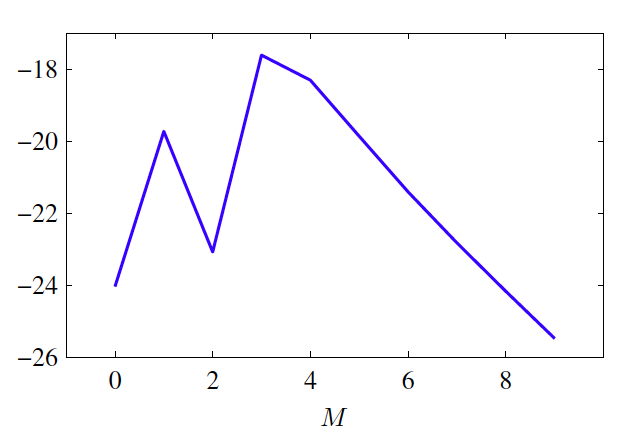

<center>图3.14 图中画的是模型证据与$M$阶数的比较，对于多项式回归模型，显示出最佳证据模型是$M=3$。</center>

#### 3.5.2 最大化证据函数

让我们先考虑$p(\mathbf{t} \mid \alpha, \beta)$的最大化表示$\alpha$。这可以通过先定义如下特征向量等式来完成

$$\bigr(\beta\mathbf{\Phi}^{\mathsf{T}}\mathbf{\Phi}\bigr)u_i = \lambda_iu_i$$

从3.81中，那么$\mathbf{A}$有特征值$\alpha + \lambda_i$。现在考虑一个3.86中包含$\ln |\mathbf{A}|$的导数项来表示$\alpha$。我们有

$$\frac{d}{d\alpha}\ln |\mathbf{A}| = \frac{d}{d\alpha}\ln\prod_i\bigr(\lambda_i + \alpha\bigr) = \frac{d}{d\alpha}\sum_i\ln\bigr(\lambda_i + \alpha\bigr) = \sum_i\frac{1}{\lambda_i + \alpha}$$

因此3.86表示$\alpha$的极值点满足

$$0=\frac{M}{2\alpha}-\frac{1}{2}\mathbf{m}_N^{\mathsf{T}}\mathbf{m}_N - \frac{1}{2}\sum_i\frac{1}{\alpha + \lambda_i}$$

两边同时乘以$2\alpha$，并整理，我们得到

$$\alpha\mathbf{m}_N^{\mathsf{T}}\mathbf{m}_N = M - \alpha\sum_i\frac{1}{\alpha + \lambda_i} = \gamma$$

由于在$i$上的求和有$M$项，因此$\gamma$可以写作如下

$$\gamma = \sum_i\frac{\lambda_i}{\alpha + \lambda_i}$$

对于$\gamma$的解释我们待会儿讨论。从3.90中我们看到$\alpha$的最大边缘似然满足

$$\alpha = \frac{\gamma}{\mathbf{m}_N^{\mathsf{T}}\mathbf{m}_N}$$

需要注意的是这是$\alpha$的隐解，并不是因为$\gamma$依赖于$\alpha$，而是因为后验分布自身的$\mathbf{m}_N$模式依赖于$\alpha$的选择。我们因此会采用迭代方法来对$\alpha$进行初始化选择，使用它来找到3.53给出的$\mathbf{m}_N$，同时为了评估由3.91给出的$\gamma$。这些值然后会被用户重新评估3.92的$\alpha$，重复这个过程直至收敛。需要注意的是因为矩阵$\mathbf{\Phi}^{\mathsf{T}}\mathbf{\Phi}$是被固定的，一开始我们就会计算它的特征值，然后通过$\beta$简单地乘以这些值来得到$\lambda_i$。

需要强调的是$\alpha$值是单纯地从观测训练集中定义的。星币最大化似然方法，为了最优化模型复杂度，并没有数据集的依赖要求。

我们可以使用相同的方法来最大化边缘私人3.86得到$\beta$。为了完成这个，我们注意到由3.87定义的特征值$\lambda_i$是与$\beta$成比例的，因此$d\lambda_i/d\beta$给出如下

$$\frac{d}{d\beta}\ln|\mathbf{A}|=\frac{d}{d\beta}\sum_i\ln\bigr(\lambda_i + \alpha\bigr) = \frac{1}{\beta}\sum_i\frac{\lambda_i}{\lambda_i+\alpha} = \frac{\gamma}{\beta}$$

边缘私人的极值点因此满足

$$0 = \frac{N}{2\beta} - \frac{1}{2}\sum_{n=1}^N\bigr\{t_n - \mathbf{m}_N^{\mathsf{T}}\mathbf{\phi}\bigr(\mathbf{x}_n\bigr)\bigr\}^2 - \frac{\gamma}{2\beta}$$

整理一下我们得到

$$\frac{1}{\beta} = \frac{1}{N-\gamma}\sum_{n=1}^N\bigr\{t_n - \mathbf{m}_N^{\mathsf{T}}\mathbf{\phi}\bigr(\mathbf{x}_n\bigr)\bigr\}^2$$

同样，这是$\beta$的隐解，可以通过选择一个初始化$\beta$解，然后使用这个来计算$\mathbf{m}_N$和$\gamma$，然后使用3.95重新评估$\beta$，重复直到收敛。如果$\alpha$和$\beta$都是从数据中定义的，那么它们的值可以在每次$\gamma$更新后重新被评估。

#### 3.5.3 有效参数数

3.92这个结果有一个优雅的解释（MacKay，1992a），它提供了$\alpha$贝叶斯解的更深入了解。为了弄明白这个，考虑似然函数的等高线，和如图3.15的先验。这里我们隐式地转换为参数空间中的旋转轴集合，与3.87中定义的特征向量$u_i$对齐。似然函数的等高线时轴对齐椭圆。特征值$\lambda_i$度量了似然函数的曲率，如图3.15中的特征值$\lambda_1$与$\lambda_2$相比要小（因为更小的曲率其相应的似然函数的曲率更大）。因为$\beta\mathbf{\Phi}^{\mathsf{T}}\mathbf{\Phi}$是正定矩阵，它只有正的特征值，所以比率$\lambda_i/\lambda_i + \alpha$是位于0到1之间的。因此，由3.91定义的$\gamma$将会在范围$0 \le \gamma \le M$内。对于方向$\lambda_i \ge \alpha$，相应的参数$w_i$将接近于最大似然值，比率$\lambda_i/\lambda_i + \alpha$将接近于1。这样的参数称作准确定义，因为这些值受限于数据。相反，对于方向$\lambda_i \le \alpha$，其相应的参数$w_i$将接近于0，比率$\lambda_i/\lambda_i + \alpha$也是。这些是似然函数对参数值相对不敏感的方向，因为参数已经被设置为较小的值。由3.91定义的$\gamma$因此可以度量准确定义参数的所有有效数。

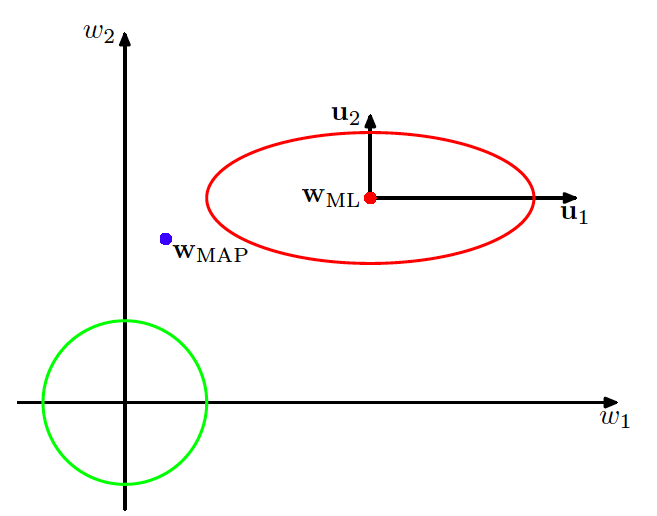

<center>图3.15 似然函数（红色）等高线，和先验（绿色）参数空间中的坐标轴被旋转与高斯特征向量$\mathbf{u}_i$对其，对于$\alpha=0$，后验模式是由最大似然解$\mathbf{w}_{\text{ML}}$给出的，对于非0$\alpha$，模式有$\mathbf{w}_{\text{MAP}} = \mathbf{m}_N$。在$w_1$方向上的特征值$\lambda_1$是由3.87定义的，与$\alpha$相比，$\lambda_1/\lambda_1 + \alpha$是接近于0，其相应的$\text{MAP}$值$w_1$也接近于0.比较而言，方向$w_2$上的特征值$\lambda_2$比$\alpha$要大，所以$\lambda_2/(\lambda_2 + \alpha)$接近于1，$\text{MAP}$值$w_2$接近于最大似然值。</center>

通过将其与3.21给出的相应最大似然结果进行比较我们可以获得对重评估$\beta$3.95结果的一些了解。这两个公式都将方差（逆精度）表示为目标与模型预测之间的平方差的均值。它的不同之处就是最大似然中的分母是数据点的数目是$N$，而贝叶斯结果是用$N-\gamma$来替代了。我们回想一下1.56，单变量$x$上的高斯分布的最大似然评估方差，给出如下

$$\sigma_{\text{ML}}^2 = \frac{1}{N}\sum_{n=1}^N\bigr(x_n - \mu_{\text{ML}}\bigr)^2$$

这个评估是有偏差的，那是因为最大似然解$\mu_{\text{ML}}$的均值拟合了一些数据中的噪声。实际上，这已经消耗了模型中的一个自由度。其相应的无偏估计由1.59给出如下形式

$$\sigma_{\text{MAP}}^2 = \frac{1}{N-1}\sum_{n=1}^N\bigr(x_n - \mu_{\text{ML}}\bigr)^2$$

我们将在10.1.3节中看到这结果是我们在未知均值上的边缘化的贝叶斯处理得到的。贝叶斯结果中的分母因子$N-1$被用于拟合均值和消除最大似然中的偏差。现在考虑线性回归模型的相应结果。目标分布的均值现在是由函数$\mathbf{w}^{\mathsf{T}}\mathbf{\phi}(\mathbf{x})$给出，它包含$M$个参数。但是，并不是所有的这些参数都能微调到数据。有效参数数是由$\gamma$定义的，将剩余$M-\gamma$参数集设置为先验的小值。这反应在了方差贝叶斯结果分母中的因子$N-\gamma$上，从而纠正了最大似然解的偏差。

我们可以使用1.1节中的正弦合成数据集画出超参数是指的证据框架，同时包含9个基函数的高斯基函数模型，模型中所有的参数数量是通过包含偏置的$M=10$的多项式给出的。这里，为了简化说明，我们设置$\beta$为11.1中的真实值，然后使用证据框架来定义$\alpha$，如图3.16所示。

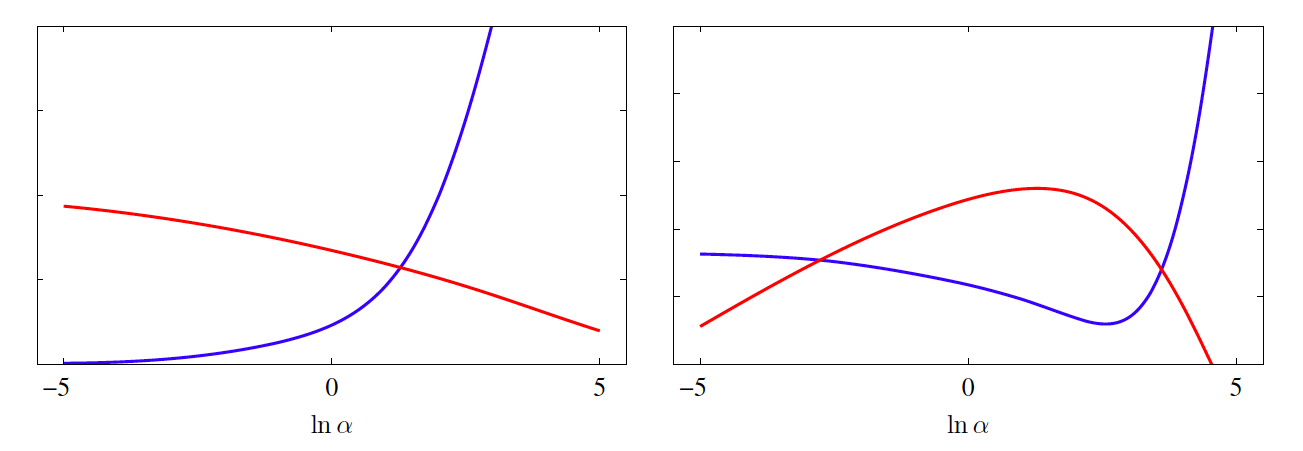

<center>图3.16 左图显示$\gamma$（红色曲线）和$2\alpha E_W(\mathbf{m}_N)$（蓝色）与$\ln\alpha$正弦合成数据集。这两个曲线的交汇点定义了由证据流程给出的最优值$\alpha$。右图显示的是相应的对数证据$\ln p(\mathbf{t} \mid \alpha, \beta)$图和$\ln\alpha$（红色曲线）显示的峰值与左图中曲线交叉点是已知的。同时证明测试集误差（蓝色曲线）显示证据最大是发生在最佳泛化点附近的。</center>

我们可以看到参数$\alpha$控制着参数$\{w_i\}$的幅度，通过绘制的度量参数与有效参数数$\gamma$，如图3.17所示。

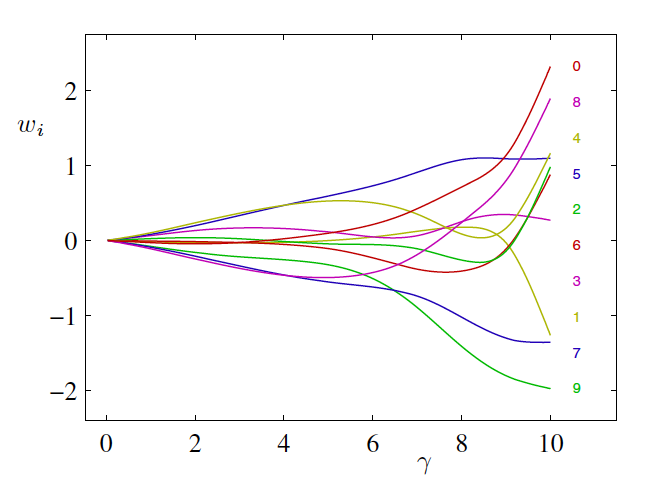

<center>图3.17 图中画的是高斯基函数10个参数$w_i$与有效参数$\gamma$数，超参数在范围$0 \le \alpha \le ∞$内变化，导致$\gamma$在范围$0 \le \gamma \le M$内变动。</center>

如果我们考虑限制$N \ge M$，其数据点的数量相对于参数的数量是大的，那么从3.87中所有的参数将由数据定义，因为$\mathbf{\Phi}^{\mathsf{T}}\mathbf{\Phi}$包含一个所有数据点上的隐式加和，所以特征值$\lambda_i$会随着数据集的大小而增长。在本例中，$\gamma = M$，重新评估$\alpha$和$\beta$会变成

$$\alpha = \frac{M}{2E_W\bigr(\mathbf{m}_N\bigr)}$$

$$\beta = \frac{N}{2E_D\bigr(\mathbf{m}_N\bigr)}$$

其中$E_W$和$E_D$是由3.25和3.26各自定义。这个结果可以用作完整证据重新评估公式易于计算的近似，因为它们不需要评估Hessian的特征值频谱。

#### 3.6 固定基函数的局限

在本章中，我们主要关注包含线性组合模型的非线性基函数。我们也看到参数中的线性假设引出包含最小二乘问题的闭合解，和已处理的贝叶斯等的一些有用性质。此外，对于一个合适基函数的选择，我们可以从输入变量到目标进行任意非线性映射的建模。在下一张忠，我们将研究类似类别模型的分类。

因此，似乎这样的线性模型构成了解决模式识别问题的通用框架。不幸的是，在线性模型上有一些很有意味的缺点，这些使得我们会在后续章节中更复杂的模型，比如支持向量机和神经网络中遇到。

难点源自于基函数$\phi_j(\mathbf{x})$在观测训练集之前是固定的，并且在1.4节中的维数灾难中也有显现。因此，基函数的数量会迅速增长，一般是输入空间维度$D$的指数级别的。

幸运的是，有真实数据集的两个性质，我们可以用来缓解这个问题。首先，由于输入变量间的强相关性，数据向量$\{\mathbf{x}_n\}$通常接近非线性流形，其内在维度小于输入空间的维度。我们将在第12章中考虑手写数字图像时看到这个例子。如果我们使用局部基函数，我们将其散布在值包含数据区域的输入空间内。这种方法在径向基函数中用到，也会在支持向量和相关向量机中用到。使用具有$S$形的非线性自适应基函数的神经网络模型可以调整参数，使得基函数在其上变化的输入空间区域对应于流形数据。第二个属性是目标变量可能仅对流形数据内的少量可能方向具有显著依赖性。神经网络可以通过选择响应基函数输入空间方向来利用此属性。